In [12]:
import doctest
import io
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [39]:
df = pd.read_csv("sea_otters_table.csv")
#df_regions = df.groupby("Region").sum()
#df_regions
#df[df["Region"]=="ALL"]
df_filtered = df.loc[slice(28), :]
df_filtered

,Region,Year,NumShark,NumCarcs,NumOth,PropShrk,MeanPop,PercapShrk,PercapOth
0,ALL,1985,3,15,12,0.2000,1313.6667,0.0023,0.0091
1,ALL,1986,1,9,8,0.1111,1416.6667,0.0007,0.0056
2,ALL,1987,8,22,14,0.3636,1536.0000,0.0052,0.0091
3,ALL,1988,0,15,15,NaN,1657.3333,NaN,0.0091
4,ALL,1989,4,18,14,0.2222,1747.3333,0.0023,0.0080
5,ALL,1990,2,15,13,0.1333,1753.6667,0.0011,0.0074
6,ALL,1991,4,17,13,0.2353,1825.6667,0.0022,0.0071
7,ALL,1992,6,25,19,0.2400,1907.3333,0.0031,0.0100
8,ALL,1993,11,43,32,0.2558,2093.6667,0.0053,0.0153
9,ALL,1994,4,36,32,0.1111,2233.0000,0.0018,0.0143


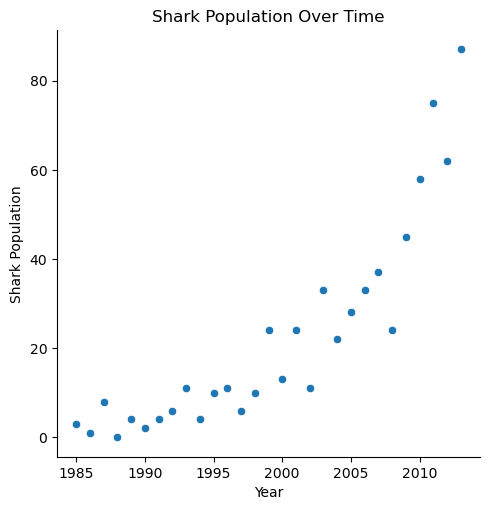

In [40]:
plot = sns.relplot(df_filtered, x="Year", y="NumShark")
plot.set(title = "Shark Population Over Time", xlabel = "Year", ylabel = "Shark Population")

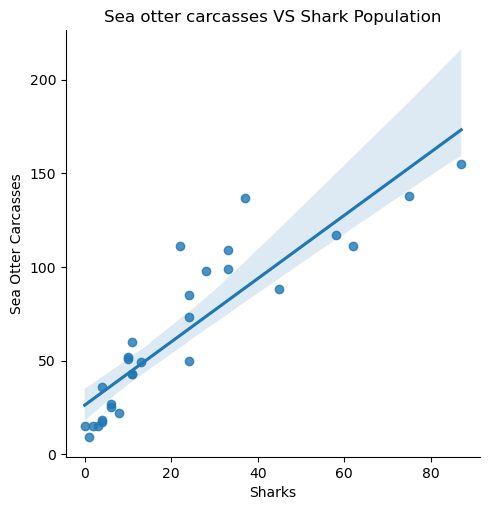

In [41]:
plot = sns.lmplot(df_filtered, x="NumShark", y="NumCarcs")
plot.set(title = "Sea otter carcasses VS Shark Population", xlabel = "Sharks", ylabel = "Sea Otter Carcasses")

   ## Sea Otter Population Over Time
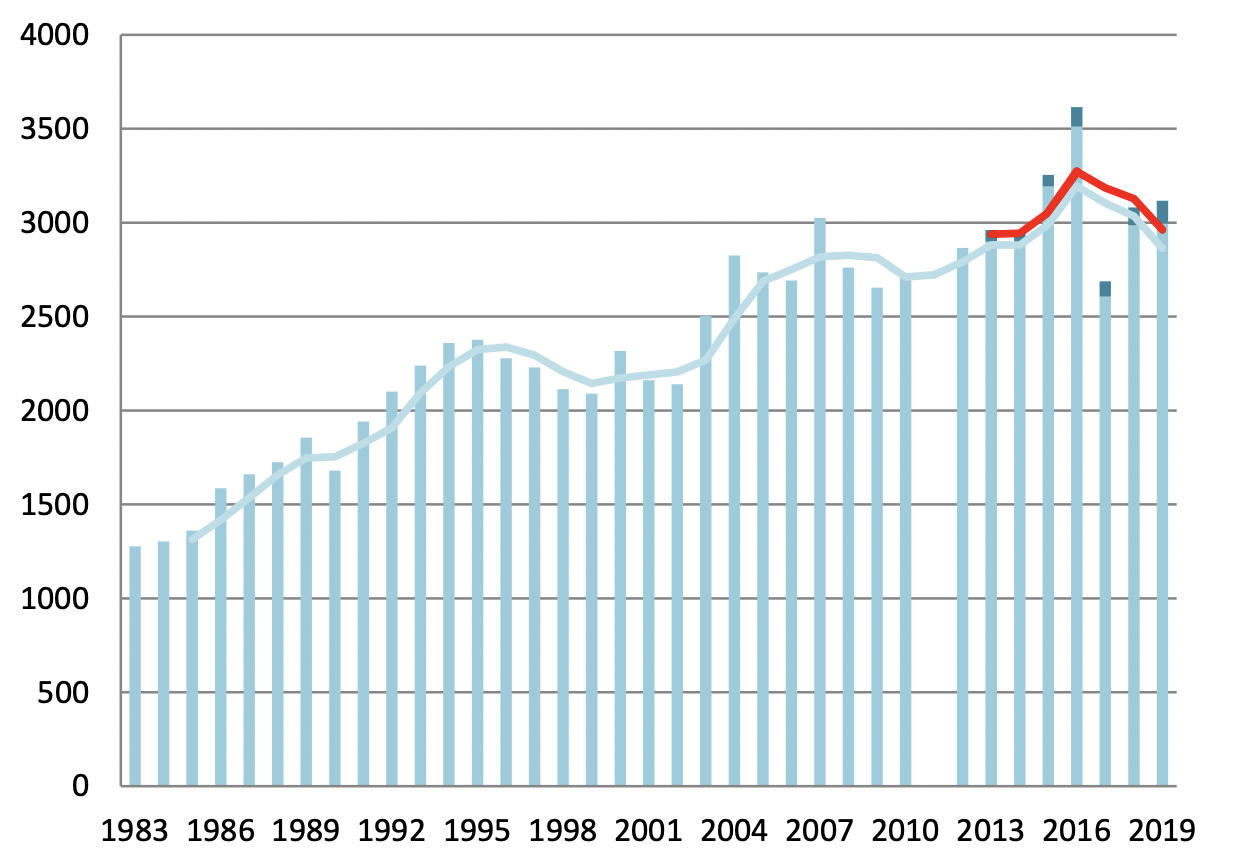

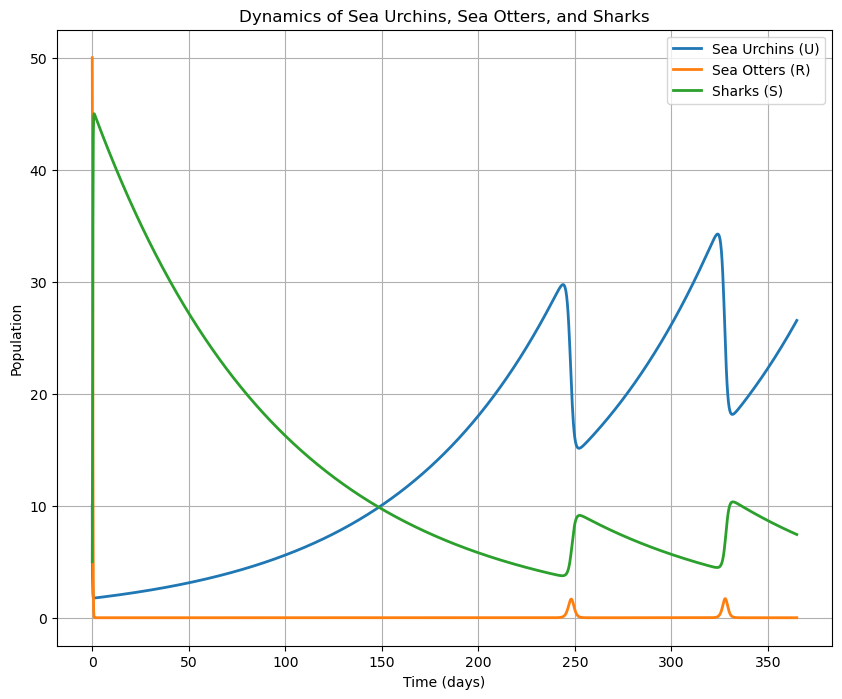

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define constant parameters (all set to 0.1)
'''a = 0.1   
f = 0.1   

b = 0.1  
c = 0.1   
d = 0.1   

k = -0.2 
e = 0.1   '''

a = 0.0117 
f = 0.1228

b = 0.1004
c = 0.0544
d = 0.2113

k = 0.0103
e = 0.1549

# Define the system of ODEs based on your equations
def system(y, t, a, f, b, c, d, k, e):
    U, R, S = y  # U: sea urchins, R: sea otters, S: sharks
    dU_dt = a * U - f * U * R
    dR_dt = b * R + c * U * R - d * S * R
    dS_dt = -k * S + e * S * R
    return [dU_dt, dR_dt, dS_dt]

# Initial conditions: [U, R, S]
y0 = [10, 50, 5]

# time span:
t = np.linspace(0, 365, 2000)

# Solve the system:
solution = odeint(system, y0, t, args=(a, f, b, c, d, k, e))

# Extract the solution for each species
U = solution[:, 0]
R = solution[:, 1]
S = solution[:, 2]

# Plot the results
plt.figure(figsize=(10, 8))
plt.plot(t, U, label='Sea Urchins (U)', linewidth=2)
plt.plot(t, R, label='Sea Otters (R)', linewidth=2)
plt.plot(t, S, label='Sharks (S)', linewidth=2)
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.title('Dynamics of Sea Urchins, Sea Otters, and Sharks')
plt.legend()
plt.grid(True)
plt.show()